<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это третья итерация. 

</div>



<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>


<b>Комментарий от ревьюера</b>

Привет! Меня зовут Ярослав Кальманов, я буду делать ревью твоего проекта. Давай будем общаться на «ты».

Мои комментарии будут в ячейках "Комментарий от ревьюера".

<div class="alert alert-danger"> 
Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я принял проект. 
</div>
<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь сделать немного по-другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">
Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.  
</div>

Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span></div>

# Определение перспективного тарифа для телеком компании

Я аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.




<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Отличное начало.
</div>

## Изучение данных из файла

Открыть файл с данными и изучите общую информацию

In [2]:
import pandas as pd
import numpy as np

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.sample(n=5, random_state=5)

,id,call_date,duration,user_id
127538,1327_113,2018-09-04,2.09,1327
122887,1317_396,2018-11-12,17.91,1317
15831,1043_255,2018-07-11,18.55,1043
190262,1468_233,2018-12-03,0.00,1468
99267,1251_629,2018-07-13,7.01,1251


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В датасете звонков мы видим, что у нас кажется много очень коротких звонков и звонков равны 0, стоит подумать, что с ними делать на этапе предобработки. Формат дат звонков неудобен для анализа стоит его заменить на формат год-месяц-число.

In [6]:
internet.sample(n=5, random_state=5)

,id,mb_used,session_date,user_id
28909,1101_15,112.63,2018-09-29,1101
32694,1114_91,257.97,2018-08-12,1114
84812,1288_125,232.60,2018-10-05,1288
103889,1352_113,245.67,2018-11-27,1352
139492,1468_286,348.46,2018-03-25,1468


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


В датасете интернета также как в звонках есть много 0 и очень маленьких значений, стоит как-то их обработать на следующем этапе.

In [9]:
messages.sample(n=5, random_state=5)

,id,message_date,user_id
48024,1213_103,2018-10-09,1213
57450,1251_914,2018-08-19,1251
30509,1134_227,2018-11-03,1134
31356,1138_27,2018-11-23,1138
91736,1379_422,2018-10-15,1379


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Для сообщений так же стоит поменять формат даты.

In [12]:
users.sample(n=5, random_state=5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
241,1241,71,NaN,Новосибирск,Инна,Андреенко,2018-05-02,smart
448,1448,42,NaN,Кострома,Ростислав,Дроздов,2018-09-16,smart
75,1075,25,NaN,Екатеринбург,Рафаэль,Никулин,2018-11-02,smart
212,1212,21,NaN,Саранск,Руслан,Пономарев,2018-11-09,smart
481,1481,70,NaN,Москва,Клавдия,Чижова,2018-02-26,smart


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В пользователях у нас 500 уникальных значений, значит мы анализируем информацию о 500 пользователях, даты также надо привести к единому формату год-месяц-число для упращения анализа.

In [15]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Тарифы это справочная таблица в ней нам ничего менять не нужно.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>


## Предобработка данных


### Подготовить данные
- Привести данные к нужным типам;
- Найдти и исправить ошибки в данных.

Для начала приводим все даты к единому понятному виду.

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Далее смотрим на подозрительно маленькие значения длительности звонков.

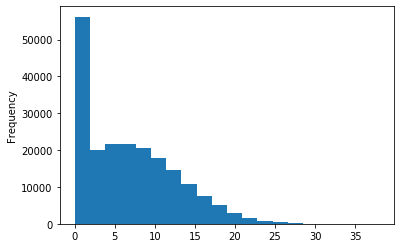

In [17]:
calls['duration'].plot(kind='hist', bins=20)

Нулевых значений действительно много, это могут быть как сбросы звонка, так и автоматический сброс при занятом телефоне. Скорее всего за звончи с нулевой длительностью опеатор не списывает денег. И так как наша ключевая задача в данном проекте, это сравнение тарифов, нам важно проверить перед тем как удалять такое большое колличество данных, не отличаются ли тарифы числом подобных звонков.

In [18]:
map_to_fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
calls['tariff'] = calls['user_id'].map(map_to_fill_tariff)
calls['tariff'].value_counts()

smart    130315
ultra     72292
Name: tariff, dtype: int64

Значения, конечно, отличаются между тарифами, но в обоих тарифах их много, значит это скорее всего не какая-то техническая ошибка, а действительно сброшенные пользователями звонки и мы можем их удалить, так как они не учитываются при стоимости тарифа.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Тут стоило смотреть на долю таких звонков по тарифам, а не на абсолютные значения. 
</div>


In [19]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

Аналогичная проблема есть с потрачеными мегабайтами. У нас тоже много значений близких к 0. 

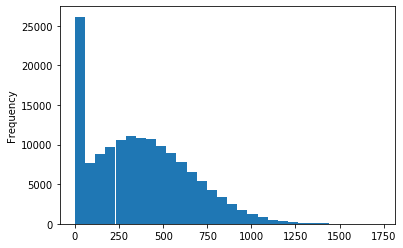

In [20]:
internet['mb_used'].plot(kind='hist', bins=30)


Мне кажется, в этом случае мы можем спокойно удалить такие наблюдения, так как за подобные заходы в интернет не снимаются деньги.

In [21]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

Для удобства анализа преобразуем таблицы так чтобы в них была только интересующая нас информация.

In [26]:
internet.mb_used = np.ceil(internet.mb_used)
internet_group = internet[['mb_used','user_id','session_date']].groupby(['user_id','session_date']).agg(['sum', 'count'])
internet_group.columns = internet_group.columns.droplevel(0)
internet_group = internet_group.reset_index()
internet_group.columns = ['user_id', 'session_date', 'mb_used','num_sessions']
internet_group.head(5)

,user_id,session_date,mb_used,num_sessions
0,1000,2018-05-28,907.0,2
1,1000,2018-05-31,1345.0,2
2,1000,2018-06-01,1611.0,2
3,1000,2018-06-03,951.0,2
4,1000,2018-06-05,359.0,1


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Обрати внимание, что оператор округляет все Мб и минуты в большую сторону. Тебе тоже нужно округлить эти значения перед группировкой данных.
</div>

<div class="alert alert-info">
    округлила перед группировкой, спасибо
</div>


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера 2</b>
    
Нам тут не подойдет метод `.round()`, потому что он округляет до ближайшего целого числа, а нам нужно округлять вверх (т.е. 5.1 => 6). Попробуй найти нужную функцию в библиотеке numpy
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 3</b>

`np.floor` округляет вниз, поэтому нам не подходит. Нужно было использовать `np.ceil` https://numpy.org/doc/stable/reference/generated/numpy.ceil.html

</div>

In [22]:
messages_group = messages[['id','user_id','message_date']].groupby(['user_id','message_date']).agg(['count'])
messages_group.columns = messages_group.columns.droplevel(0)
messages_group = messages_group.reset_index()
messages_group.columns = ['user_id', 'message_date', 'num_messages']
messages_group.head(5)

,user_id,message_date,num_messages
0,1000,2018-05-25,2
1,1000,2018-05-27,2
2,1000,2018-05-28,6
3,1000,2018-05-29,6
4,1000,2018-05-30,5


In [27]:
calls.duration = np.ceil(internet.mb_used)
calls_group = calls[['user_id','call_date', 'duration']].groupby(['user_id','call_date']).agg(['count', 'sum'])
calls_group.columns = calls_group.columns.droplevel(0)
calls_group = calls_group.reset_index()
calls_group.columns = ['user_id', 'call_date', 'num_calls', 'duration']
calls_group.head(5)

,user_id,call_date,num_calls,duration
0,1000,2018-05-26,6,3116.0
1,1000,2018-05-27,0,0.0
2,1000,2018-05-28,1,536.0
3,1000,2018-05-29,2,646.0
4,1000,2018-05-30,2,824.0


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Обрати внимание, что оператор округляет все Мб и минуты в большую сторону. Тебе тоже нужно округлить эти значения перед группировкой данных.
</div>

<div class="alert alert-info">
    округлила перед группировкой, спасибо
</div>


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера 2</b>
    
Тут тоже не подойдет метод `.round()`
</div>



<div class="alert alert-success">
    
<b> Комментарий от ревьюера 3</b>

`np.floor` округляет вниз, поэтому нам не подходит. Нужно было использовать `np.ceil` https://numpy.org/doc/stable/reference/generated/numpy.ceil.html

</div>

### Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [24]:
calls_group['month'] = calls_group['call_date'].dt.month
calls_group= calls_group[['user_id','month', 'duration','num_calls']].groupby(['user_id','month']).agg(['count', 'sum'])
calls_group.head(10)

duration        num_calls    
                 count    sum     count sum
user_id month                              
1000    5            6  149.0         6  17
        6           20  159.0        20  28
        7           24  319.0        24  41
        8           20  391.0        20  42
        9           26  439.0        26  46
        10          25  328.0        25  44
        11          23  318.0        23  37
        12          23  314.0        23  38
1001    11          23  410.0        23  45
        12          24  393.0        24  47


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Тут что-то не так с группировкой. Сейчас в `count` попадает количество дней в месяце, когда клиент совершал звонки, а нужно количество звонков. То есть тебе нужно суммировать по признаку num_calls из таблицы calls_group
    
Поправь, пожалуйста
</div>

<div class="alert alert-info">
Пересчитала, ненужные столбцы удалю дальше, когда буду делать итоговую табличку
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Супер!

</div>

#### Количество отправленных сообщений по месяцам

In [25]:
messages_group['month'] = messages_group['message_date'].dt.month
messages_group = messages_group[['user_id','month', 'num_messages']].groupby(['user_id','month']).agg(['sum'])
messages_group.head(10)

num_messages
                       sum
user_id month             
1000    5               22
        6               60
        7               75
        8               81
        9               57
        10              73
        11              58
        12              70
1002    6                4
        7               11

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>


#### Объем израсходованного интернет-трафика по месяцам

In [26]:
internet_group

,user_id,session_date,mb_used,num_sessions
0,1000,2018-05-28,907.0,2
1,1000,2018-05-31,1346.0,2
2,1000,2018-06-01,1611.0,2
3,1000,2018-06-03,952.0,2
4,1000,2018-06-05,359.0,1
...,...,...,...,...
66859,1499,2018-12-26,499.0,2
66860,1499,2018-12-27,340.0,2
66861,1499,2018-12-28,169.0,1
66862,1499,2018-12-29,818.0,2


In [27]:
internet_group['month'] = internet_group['session_date'].dt.month
internet_group = internet_group[['user_id','month', 'mb_used']].groupby(['user_id','month']).agg(['sum', 'count'])
internet_group.head(10)

mb_used      
                   sum count
user_id month               
1000    5       2253.0     2
        6      23232.0    24
        7      14004.0    19
        8      14054.0    18
        9      14569.0    16
        10     14701.0    16
        11     14756.0    18
        12      9818.0    15
1001    11     18428.0    23
        12     14040.0    19

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>


Для анализа выручки с каждого пользователя объединим все таблицы в одну. 

In [28]:
final = pd.merge(calls_group, messages_group, how='outer', on=['user_id', 'month'])
final = pd.merge(final, internet_group, how='outer', on=['user_id', 'month'])
final

duration        num_calls       num_messages  mb_used      
                 count    sum     count   sum          sum      sum count
user_id month                                                            
1000    5          6.0  149.0       6.0  17.0         22.0   2253.0   2.0
        6         20.0  159.0      20.0  28.0         60.0  23232.0  24.0
        7         24.0  319.0      24.0  41.0         75.0  14004.0  19.0
        8         20.0  391.0      20.0  42.0         81.0  14054.0  18.0
        9         26.0  439.0      26.0  46.0         57.0  14569.0  16.0
...                ...    ...       ...   ...          ...      ...   ...
1489    10         NaN    NaN       NaN   NaN         21.0  19558.0  26.0
        11         NaN    NaN       NaN   NaN         20.0  17489.0  24.0
        12         NaN    NaN       NaN   NaN         35.0  17322.0  20.0
1240    2          NaN    NaN       NaN   NaN          NaN    960.0   2.0
1476    4          NaN    NaN       NaN   NaN          NaN    531.0   1.0

[3214 rows x 7 columns]

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Тут нужно использовать другой способ соединения таблиц (изменить параметр how). Сейчас, если пользователей совершал звонки, но не отправлял сообщения, он не попадет в твою таблицу (то же самое с интернетом). 
    
Так получится, потому что при методе left мы берем все ключи из левой таблице и ищем им соответствия в правой таблице. Если в правой таблице будут уникальные значения, мы их проигнорируем. Для этого задания нам нужно взять все записи из правой и левой таблицы.
    
Про соединения можешь посмотреть тут https://medium.com/@Lexx01/sql-inner-и-outer-join-64f3862d8540
    
</div>


<div class="alert alert-info">
теперь использую outer чтобы взять все из левой и правой таблицы и их пересечения
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Все верно.

</div>

In [29]:
final

duration        num_calls       num_messages  mb_used      
                 count    sum     count   sum          sum      sum count
user_id month                                                            
1000    5          6.0  149.0       6.0  17.0         22.0   2253.0   2.0
        6         20.0  159.0      20.0  28.0         60.0  23232.0  24.0
        7         24.0  319.0      24.0  41.0         75.0  14004.0  19.0
        8         20.0  391.0      20.0  42.0         81.0  14054.0  18.0
        9         26.0  439.0      26.0  46.0         57.0  14569.0  16.0
...                ...    ...       ...   ...          ...      ...   ...
1489    10         NaN    NaN       NaN   NaN         21.0  19558.0  26.0
        11         NaN    NaN       NaN   NaN         20.0  17489.0  24.0
        12         NaN    NaN       NaN   NaN         35.0  17322.0  20.0
1240    2          NaN    NaN       NaN   NaN          NaN    960.0   2.0
1476    4          NaN    NaN       NaN   NaN          NaN    531.0   1.0

[3214 rows x 7 columns]

In [30]:
final.columns = final.columns.droplevel(0)
final = final.reset_index()
final.columns = ['user_id', 'month','dur_count', 'minutes', 'num_call_count','num_calls','num_messages', 'mb_used', 'num_sessions']
final.drop(['dur_count', 'num_call_count'], axis=1, inplace=True)
map_to_fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
final['tariff'] = final['user_id'].map(map_to_fill_tariff)
final.head(5)

,user_id,month,minutes,num_calls,num_messages,mb_used,num_sessions,tariff
0,1000,5,149.0,17.0,22.0,2253.0,2.0,ultra
1,1000,6,159.0,28.0,60.0,23232.0,24.0,ultra
2,1000,7,319.0,41.0,75.0,14004.0,19.0,ultra
3,1000,8,391.0,42.0,81.0,14054.0,18.0,ultra
4,1000,9,439.0,46.0,57.0,14569.0,16.0,ultra


In [31]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id         3214 non-null int64
month           3214 non-null int64
minutes         3168 non-null float64
num_calls       3168 non-null float64
num_messages    2717 non-null float64
mb_used         3201 non-null float64
num_sessions    3201 non-null float64
tariff          3214 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 201.0+ KB


Не по всем пользователям есть вся информация, логично предположить, что если у пользователя нет информации о минутах звонков, то он просто не использовал их, следовательно, ропущенные значения заменяем на нули

In [32]:
final.loc[final['minutes'].isna(), 'minutes'] = 0
final.loc[final['num_messages'].isna(), 'num_messages'] = 0
final.loc[final['mb_used'].isna(), 'mb_used'] = 0



<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты права.
</div>


#### Помесячная выручка с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

In [33]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [34]:
def paiment(row):
    messages = row['num_messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    minutes = row['minutes']
    
    if tariff == 'smart':
        extra_minutes = minutes - 500
        extra_mb = mb_used - 15360
        extra_messages = messages - 50
        
        extra_minutes = max(extra_minutes, 0)
        extra_mb = max(extra_mb, 0)
        extra_messages = max(extra_messages, 0)
        
        return (3 * extra_messages + ( 200 / 1024) * extra_mb + 3 * extra_minutes + 550) 
    
    else:
        extra_minutes = minutes - 3000
        extra_mb = mb_used - 30720
        extra_messages = messages - 1000
        
        extra_minutes = max(extra_minutes, 0)
        extra_mb = max(extra_mb, 0)
        extra_messages = max(extra_messages, 0)
        
        return (extra_messages + (150/ 1024) * extra_mb +  extra_minutes + 1950)

final['paiment'] = final.apply(paiment, axis=1)
final.head(5)

,user_id,month,minutes,num_calls,num_messages,mb_used,num_sessions,tariff,paiment
0,1000,5,149.0,17.0,22.0,2253.0,2.0,ultra,1950.0
1,1000,6,159.0,28.0,60.0,23232.0,24.0,ultra,1950.0
2,1000,7,319.0,41.0,75.0,14004.0,19.0,ultra,1950.0
3,1000,8,391.0,42.0,81.0,14054.0,18.0,ultra,1950.0
4,1000,9,439.0,46.0,57.0,14569.0,16.0,ultra,1950.0


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, ты написала хорошую функцию.
    
Но лимиты по тарифам лучше не задавать числом, а брать из таблицы tariffs, потому что оператор может поменять условия тарифов или вроде того.
    
</div>


In [35]:
final = final.round()


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Добавь, пожалуйста, вывод к этому шагу
</div>

<div class="alert alert-info">
    Этот шаг я делала, чтобы было удобнее потом смотреть на закономерности на графиках, врядт ли платы за тарифы дробяться до 4 знаков после запятой, но теперь этот шаг по факту не нужен, так как мы округлили значения раньше
</div>


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера 2</b>
    
Я, похоже, неудачно сформулировал.
    
Добавь, пожалуйста, вывод к разделу "Предобработка данных"
</div>


<div class="alert alert-info">
Мы подготовили наблюдения по 500 клиентам компании, заменили тип данных для дат, удалили неотвеченые звонки и слишком короткие интеренет сессии, так как за них оператор не снимает плату. Кроме того многие пользователи не используют все опции своего тарифа, поэтому na в соответствующих столбцах мы замеили 0. Далее мы посчитали обоненскую плату для каждого клиента, учитывая превышал ли он свой лимит доступный по тарифу.
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 3</b>

Хороший вывод 👍

</div>

## Исследовательский анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

Рассмотрим для начала всех пользователей вне зависимости от тарифа. Возможно, есть какие-то взаимосвязи между нашими пременными.

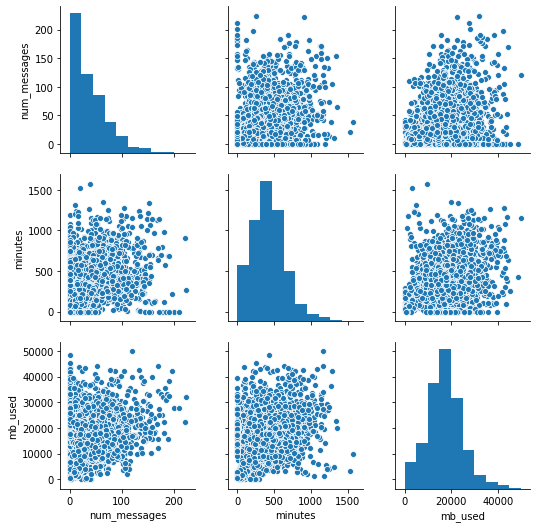

In [37]:
sns.pairplot(final, vars=['num_messages','minutes', 'mb_used'])

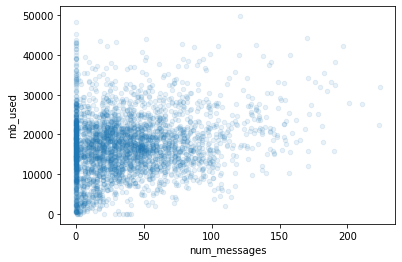

In [38]:
final.plot(x='num_messages', y='mb_used', kind='scatter', alpha=0.1) 


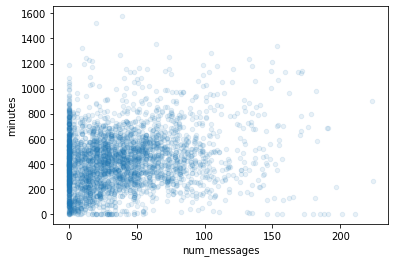

In [39]:
final.plot(x='num_messages', y='minutes', kind='scatter', alpha=0.1) 

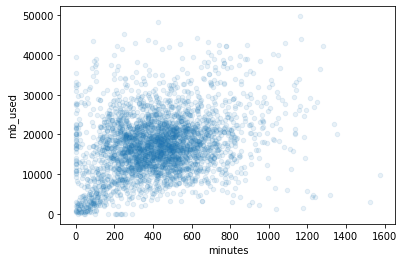

In [40]:
final.plot(x='minutes', y='mb_used', kind='scatter', alpha=0.1) 


Существует слабая связь между используемыми мегабайтами и числом отправленных сообщений. Но скорее мы здесь видим просто два неравномерных кластера, тех кто отправляет мало сообщений и мало заходит в интернет и наоборот, тех кто много делает и того и того. Это любопытное наблюдение, которое можно исследовать в дальнейшем для создания новых тарифных планов.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что посмотрела на зависимость трат пользователей. Думаю, было бы лучше сделать это в разрезе тарифов, потому что у клиентов разные лимиты и разные уровни потребления услуг связи, это может негативно сказаться на графиках.
</div>

In [41]:
def std(x): 
    return np.std(x)

def disp(x):
    return np.std(x)*np.std(x)


final[['minutes','num_messages','mb_used', 'tariff', 'paiment']].groupby(['tariff']).agg(['mean', 'sum', std, disp])


minutes                                     num_messages           \
             mean       sum         std          disp         mean      sum   
tariff                                                                        
smart   394.26873  878825.0  179.851631  32346.609255    33.384029  74413.0   
ultra   496.88934  489436.0  299.552643  89731.785724    49.363452  48623.0   

                                     mb_used                            \
              std         disp          mean         sum           std   
tariff                                                                   
smart   28.221543   796.455483  16208.425303  36128580.0   5869.140645   
ultra   47.780185  2282.946075  19468.824365  19176792.0  10082.059735   

                          paiment                                        
                disp         mean        sum         std           disp  
tariff                                                                   
smart   3.444681e+07  1197.427995  2669067.0  767.360476  588842.099459  
ultra   1.016479e+08  2059.875127  2028977.0  354.708193  125817.902173

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что рассмотрела среднее значение и СКО.
</div>


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Посчитай, пожалуйста, дисперсию
</div>

<div class="alert alert-info">
Стандартное отклонение это корень из дисперсии, так что можем просто возвести его в квадрат  
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Спасибо, что добавила. Думаю, это можно было сделать немного проще без использования собственных функций
    
`final[['minutes','num_messages','mb_used', 'tariff', 'paiment']].groupby(['tariff']).agg(['mean', 'sum', 'std', 'var'])`

</div>


Сразу можно заметить, что в тарифе ультра в среднем расходуется больше всего, что логично, так как в данный тариф входит больше минут, сообщений и мегабайт. Любопытно, что практически для всех переменных тариф ультра имеет большее стандартное отклонение, чем тариф смарт.

In [42]:
ultra = final[final['tariff'] == 'ultra']
smart = final[final['tariff'] == 'smart']

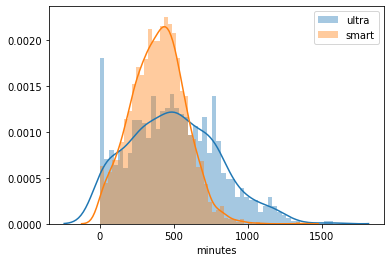

In [43]:
sns.distplot(ultra['minutes'], kde=True, bins=50)
sns.distplot(smart['minutes'], kde=True, bins=50)
plt.legend(['ultra', 'smart'])

Минуты в обоих тарифах расспределены нормально, однако тариф смарт имеет более острую вершину в районе своего среднего 395, а стандартное отклонение 178, таким образом лишь малая доля пользователей пересекает лимит минут по тарифу- 500. В то время как у тарифа ультра больше стандартное отклонение и среднее находится далеко от лимита 3000 минут, таким образом практически никто из пользователей тарифа ультра не достигают лимита по минутам. Исходя из этого можно предположить, что даже если мы сократим включенные минуы до 1500 все равно большинство пользователей тарифа не будут превышать такой лимит. Также расспределения практически полностью пересекаются из чего можно предположить, что большинство пользователей тарифа ультра, если смотреть только на используемые минуты разговора могли бы перейти на тариф смарт.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
У тебя отличный график и рассуждения
</div>

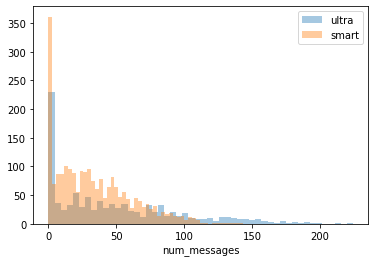

In [44]:
sns.distplot(ultra['num_messages'], kde=False, bins=50)
sns.distplot(smart['num_messages'], kde=False, bins=50)
plt.legend(['ultra', 'smart'])

Расспределение числа сообщений скорее соответсвует пуассоновскому расспределению, даже если мы удалим наблюдения пользователей, которые отправили 0 сообщений. Большинство наблюдений для тарифа смарт находятся до предела 50 сообщений. У тарифа ультра так же как и для предыдущей переменной больше стандартное отклонение.

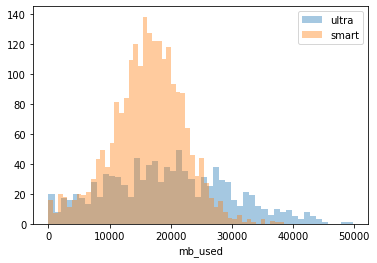

In [45]:
sns.distplot(ultra['mb_used'], kde=False, bins=50)
sns.distplot(smart['mb_used'], kde=False, bins=50)
plt.legend(['ultra', 'smart'])

Распределения использованных мегабайт для обоих тарифов соответсвует нормальному. И по пользовательскому поведению похоже на ситуацию с минутами. Стандартное отклонение для тарифа ультра больше, чем для тарифа смарт. Однако, здесь мы видим, что у обоих тарифах значительная часть наблюдений лежат за пределами бесплатного лимита мегабайт 15 000 для тарифа смарт и 30 000 для тарифа ультра. То есть чаще всего превышения лимита по тарифу происходят именно за счет превышения использованных мегабайт.

Далее посмотрим на расспределение финальной оплаты по обоим тарифам.

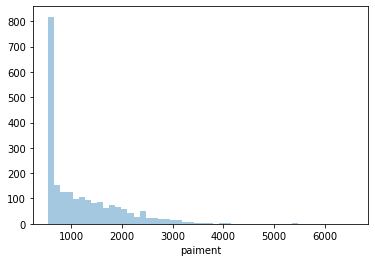

In [46]:
sns.distplot(smart['paiment'], kde=False, bins=50)

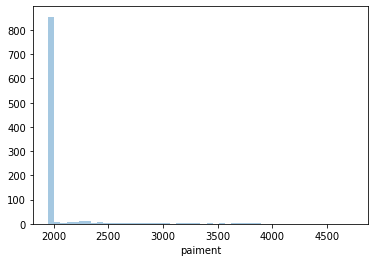

In [47]:
sns.distplot(ultra['paiment'], kde=False, bins=50)

По тарифу ультра практически нет превышений, тогда как размер оплаты для тарифа смарт намного более разнообразен.

Благадоря данному анализу, мы обнаружили, что стандартное отклонение для всех исследуемых переменных больше у тарифа ультра.Следовательно, поведение пользователей данного тарифа более разнообразно. И практически для всех не преступает лимита для данного тарифа, единственная переменная, где практически все пользователи тарифа ультра приближаются к лимиту или даже переступают его это колличество мегабайт в месяц. Возможно, можно было бы создать более дешевый тариф, с таким же колличеством мегабайт и меньшим числом минут и смс. 


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хороший вывод
</div>

## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Сформулируй, пожалуйста, нулевую и альтернативную гипотезы
</div>

<div class="alert alert-info">
    
H0: выручка тарифов не отличается
Н1: выручка тарифов отличается
    </div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, ты правильно сформулировала гипотезы.

</div>

In [48]:
from scipy import stats as st
alpha = 0.01
results = st.ttest_ind(smart['paiment'], ultra['paiment'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print('H0 не верна, группы отличаются')
else:
    print('Н0 верна, группы не отличаются')

P-value: 0.0
H0 не верна, группы отличаются


Средняя выручка для разных тарифов значимо отличается друг от друга и смотря на средние мы можем предположить, что тариф ультра в среднем все равно приносит больше, не смотря на то, что его пользователи чаще всего укладываются в базовый тарифный план.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

Подготовим таблицы по городам.


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Сформулируй, пожалуйста, нулевую и альтернативную гипотезы
</div>

<div class="alert alert-info">
    
H0: выручка в Москве не отличается от других городов
Н1: выручка в Москве отличается от других городов
    </div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, ты правильно сформулировала гипотезы.

</div>

In [49]:
map_to_fill_city = dict(pd.Series(users['city'].values, index=users['user_id']))
final['city'] = final['user_id'].map(map_to_fill_city)
moscow = final[final['city'] == 'Москва']
others = final[final['city'] != 'Москва']

In [50]:
results = st.ttest_ind(moscow['paiment'], others['paiment'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print('H0 не верна, группы отличаются')
else:
    print('Н0 верна, группы не отличаются')

P-value: 0.39444214276512524
Н0 верна, группы не отличаются


Группы не отличаются между собой, поведение в Москве и нет похоже.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

## Общий вывод


- Тариф Ультра в среднем приносит больше денег, чем тариф Смарт
- Прибыль от пользователей Москвы не отличается значимо от пользователей других городов
- В большинстве своем пользователи тарифа Ультра не используют на максимум его возможности, может быть можно сократить базовый пакет минут и смс
- Пользователи тарифа Смарт часто переплачивают за свой тариф, возможно, тем пользователям для которых переплата составляет больше 1950 рублей можно предложить перейти на тариф Ультра.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хороший вывод
</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Ответь, пожалуйста, на вопрос, какой тариф лучше с точки зрения оператора.
</div>


<div class="alert alert-info">
    Тариф ультра выгоднее для оператора, так как приносит больше денег и пользватели не используют его возможности на максимум
    </div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Спасибо за комментарий.

</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Спасибо за твой проект! Ты хорошо справилась с анализом данных и проверкой гипотез

Осталось немного доработать проект:

* округли, пожалуйста, значения минут и Мб перед группировкой данных
* поправь расчет количества звонков в месяц
* измени способ объединения таблиц
* добавь вывод к шагу
* посчитай дисперсию по тарифам
* сформулируй нулевую и альтернативную гипотезы

Жду твои исправления:)

</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>
    
Осталось доделать совсем чуть-чуть:
    
* поправить округление минут и трафика
* добавить вывод к разделу "Предобработка данных"

Жду твои исправления

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Спасибо, что учла мои комментарии. Надеюсь, эта работа была полезна для тебя. Я принимаю твой проект и желаю удачи в прохождении курса!

</div>
